# SQL Test
## Import des packages

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Récupération du dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86431,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86432,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86433,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86434,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Création et connection à la db en local

In [3]:
conn = sqlite3.connect('data_covid.db')
df.to_sql('data_covid', conn, if_exists='replace', index=False)

## Questions

###  1. How many countries are included in our data set?

In [87]:
df = pd.read_sql("""SELECT COUNT(DISTINCT location) FROM data_covid;""", conn)
df

,COUNT(DISTINCT location)
0,219


### 2. When was the most recent entry?

In [89]:
df0 = pd.read_sql("""SELECT * FROM data_covid
ORDER BY date DESC
LIMIT 1;""",conn)
df0

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2021-05-06,61162.0,365.0,226.571,2664.0,10.0,6.571,...,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511


### 3. What country had the highest single day deaths per million?

In [90]:
df1 = pd.read_sql("""SELECT SUM(new_deaths_per_million) AS death_per_day, date, location FROM data_covid
GROUP BY date, location
ORDER BY death_per_day DESC
LIMIT 1;""", conn)
df1

,death_per_day,date,location
0,218.329,2020-09-07,Ecuador


In [91]:
df1_total = pd.read_sql("""SELECT SUM(total_deaths_per_million) AS death_per_day, date, location FROM data_covid
GROUP BY date, location
ORDER BY death_per_day DESC
LIMIT 1;""", conn)
df1_total

,death_per_day,date,location
0,2929.19,2021-05-06,Hungary


### 4. Select any country. How many times have the deaths per million exceeded 1,000 in one day?

In [92]:
df2_all = pd.read_sql("""SELECT COUNT(death_per_day) AS day_over_1000, location FROM (
  SELECT SUM(total_deaths_per_million) AS death_per_day, date, location FROM data_covid
  GROUP BY date, location)
WHERE death_per_day > 1000
GROUP BY location
ORDER BY day_over_1000 DESC;""", conn)
df2_all

,day_over_1000,location
0,395,San Marino
1,211,Peru
2,188,Belgium
3,153,Andorra
4,151,Italy
5,149,Spain
6,146,North Macedonia
7,146,Bosnia and Herzegovina
8,144,Slovenia
9,137,Montenegro


In [93]:
df2_one = pd.read_sql("""SELECT COUNT(death_per_day) AS day_over_1000, location FROM (
  SELECT SUM(total_deaths_per_million) AS death_per_day, date, location FROM data_covid
  GROUP BY date, location)
WHERE death_per_day > 1000 AND location = 'Peru';""", conn)
df2_one

,day_over_1000,location
0,211,Peru


### 5. Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

In [4]:
df3 = pd.read_sql("""SELECT total_deaths_per_million, date, location FROM data_covid
WHERE location = 'United States' OR location = 'France' OR location = 'India';""",conn)
df3

,total_deaths_per_million,date,location
0,NaN,2020-01-24,France
1,NaN,2020-01-25,France
2,NaN,2020-01-26,France
3,NaN,2020-01-27,France
4,NaN,2020-01-28,France
...,...,...,...
1398,1743.439,2021-05-02,United States
1399,1744.898,2021-05-03,United States
1400,1747.717,2021-05-04,United States
1401,1750.062,2021-05-05,United States


In [5]:
df3['date'] = pd.to_datetime(df3['date'])
df3.dtypes

total_deaths_per_million           float64
date                        datetime64[ns]
location                            object
dtype: object

<AxesSubplot:xlabel='date', ylabel='total_deaths_per_million'>

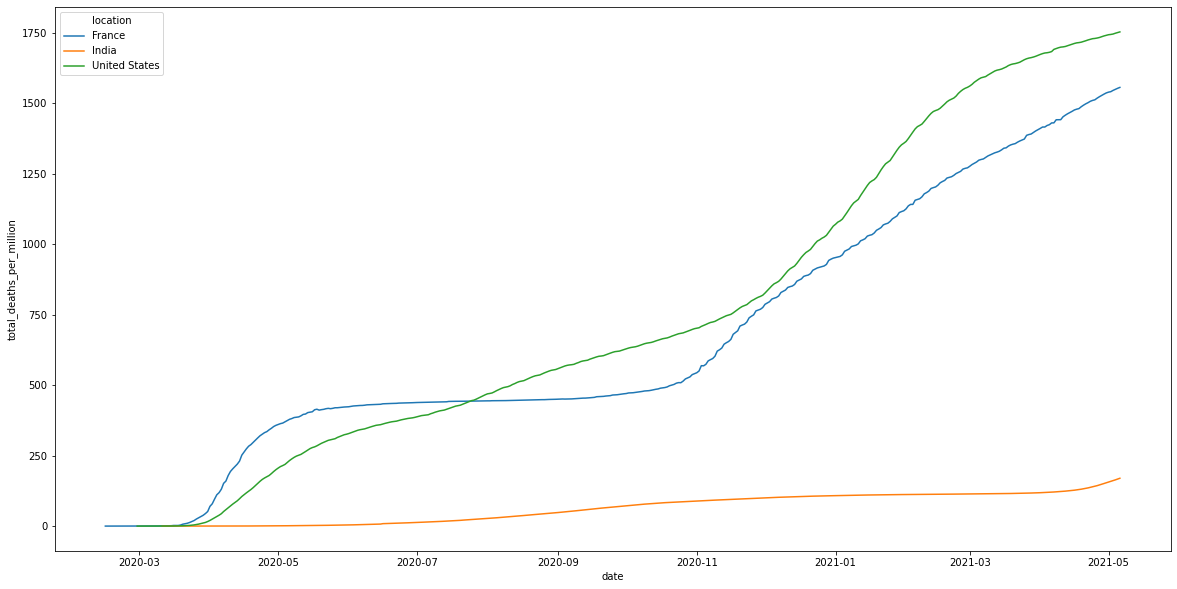

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="total_deaths_per_million", data=df3,hue='location')

In [50]:
df3_new = pd.read_sql("""SELECT new_deaths_per_million, date, location FROM data_covid
WHERE location = 'United States' OR location = 'France' OR location = 'India';""",conn)
df3_new

,new_deaths_per_million,date,location
0,NaN,2020-01-24,France
1,NaN,2020-01-25,France
2,NaN,2020-01-26,France
3,NaN,2020-01-27,France
4,NaN,2020-01-28,France
...,...,...,...
1398,0.976,2021-05-02,United States
1399,1.459,2021-05-03,United States
1400,2.819,2021-05-04,United States
1401,2.344,2021-05-05,United States


In [51]:
df3_new['date'] = pd.to_datetime(df3_new['date'])
df3_new.dtypes

new_deaths_per_million           float64
date                      datetime64[ns]
location                          object
dtype: object

<AxesSubplot:xlabel='date', ylabel='new_deaths_per_million'>

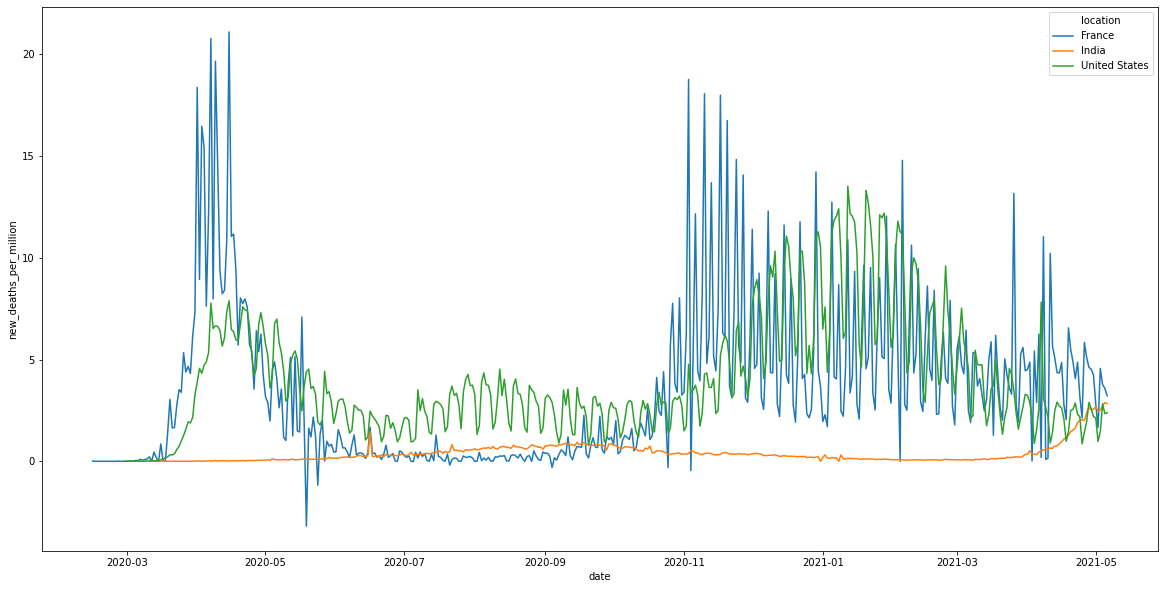

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="new_deaths_per_million", data=df3_new,hue='location')

### 6. Plot the deaths per million and cases per million by continent for your birthday in 2020. What does the data say?

In [55]:
df4 = pd.read_sql("""SELECT SUM(total_deaths_per_million), SUM(total_cases_per_million), continent FROM data_covid
WHERE date = '2020-08-29'
GROUP BY continent;
""", conn)
df4 = df4.fillna('Others')
df4

,SUM(total_deaths_per_million),SUM(total_cases_per_million),continent
0,1678.999,41601.393,Others
1,1131.666,65711.650,Africa
2,2176.686,228038.416,Asia
3,9794.806,232767.762,Europe
4,2715.645,92222.907,North America
5,31.313,1447.085,Oceania
6,3592.958,108080.692,South America


In [56]:
df4['continent'] = df4['continent'].convert_dtypes()
df4.dtypes

SUM(total_deaths_per_million)    float64
SUM(total_cases_per_million)     float64
continent                         string
dtype: object

In [57]:
df4 = df4.set_index(df4['continent'],drop=True)
del df4['continent']
df4

,SUM(total_deaths_per_million),SUM(total_cases_per_million)
continent,,
Others,1678.999,41601.393
Africa,1131.666,65711.650
Asia,2176.686,228038.416
Europe,9794.806,232767.762
North America,2715.645,92222.907
Oceania,31.313,1447.085
South America,3592.958,108080.692


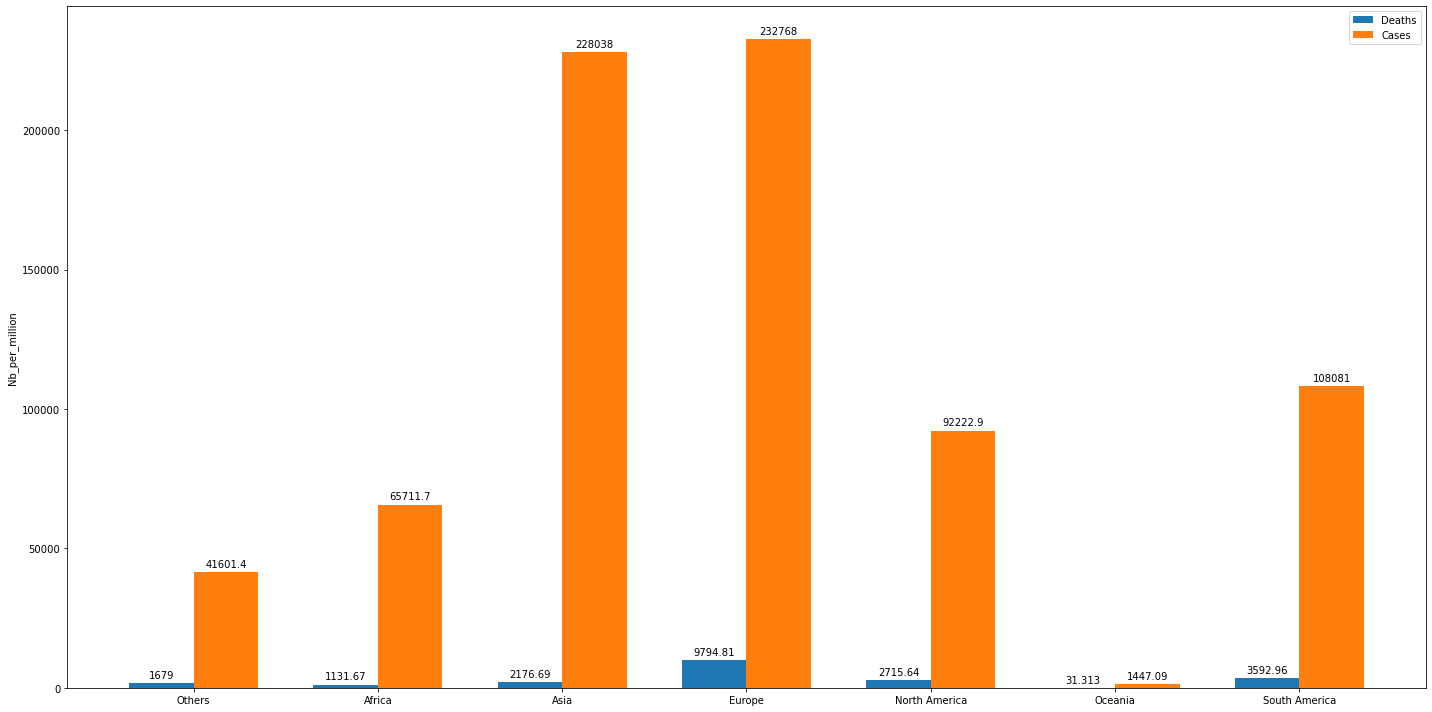

In [85]:
labels = df4.index
deaths = df4['SUM(total_deaths_per_million)']
cases = df4['SUM(total_cases_per_million)']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, deaths, width, label='Deaths')
rects2 = ax.bar(x + width/2, cases, width, label='Cases')

ax.set_ylabel('Nb_per_million')
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [61]:
df4_new = pd.read_sql("""SELECT SUM(new_deaths_per_million), SUM(new_cases_per_million), continent FROM data_covid
WHERE date = '2020-08-29'
GROUP BY continent;
""", conn)
df4_new = df4_new.fillna('Others')
df4_new

,SUM(new_deaths_per_million),SUM(new_cases_per_million),continent
0,8.458,387.944,Others
1,10.154,445.530,Africa
2,11.401,1446.405,Asia
3,20.789,1488.988,Europe
4,23.043,1318.038,North America
5,0.431,5.239,Oceania
6,33.688,1367.344,South America


In [62]:
df4_new['continent'] = df4_new['continent'].convert_dtypes()
df4_new.dtypes

SUM(new_deaths_per_million)    float64
SUM(new_cases_per_million)     float64
continent                       string
dtype: object

In [63]:
df4_new = df4_new.set_index(df4_new['continent'],drop=True)
del df4_new['continent']
df4_new

,SUM(new_deaths_per_million),SUM(new_cases_per_million)
continent,,
Others,8.458,387.944
Africa,10.154,445.530
Asia,11.401,1446.405
Europe,20.789,1488.988
North America,23.043,1318.038
Oceania,0.431,5.239
South America,33.688,1367.344


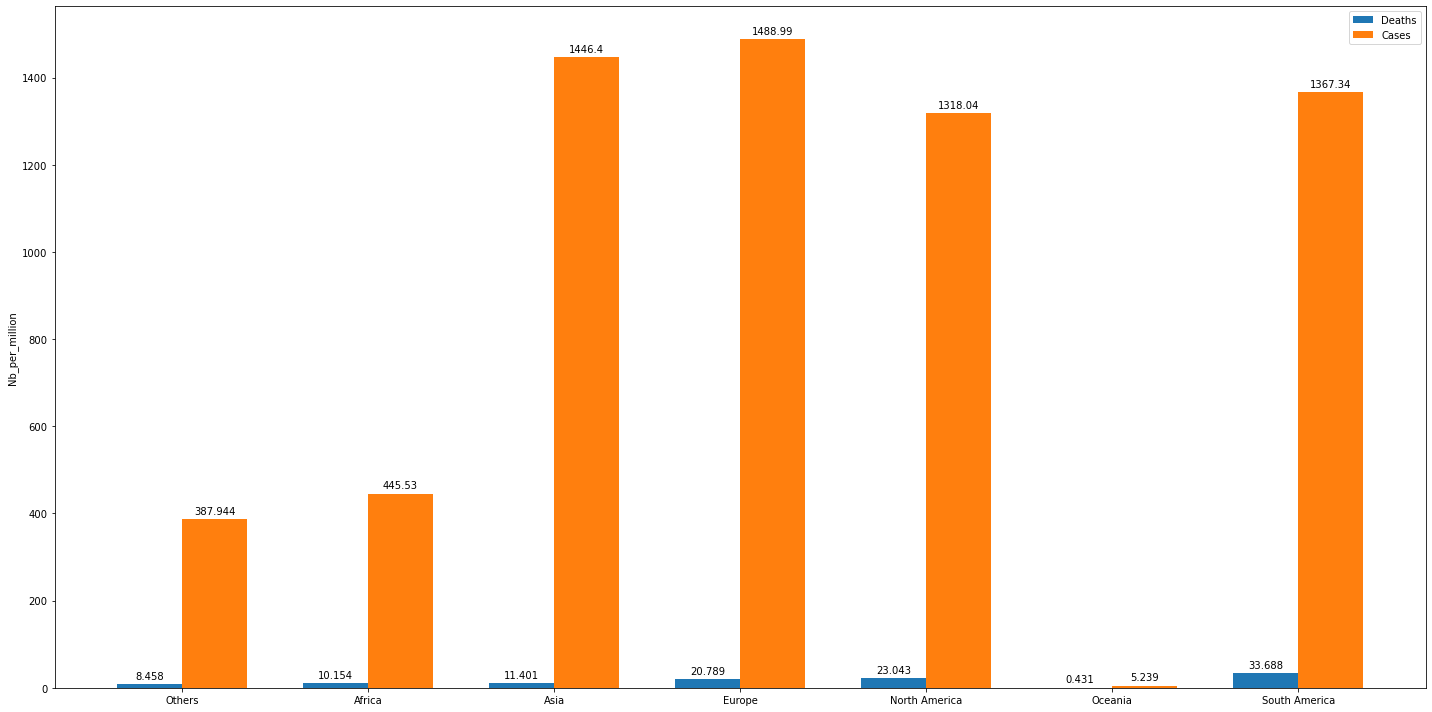

In [84]:
labels = df4_new.index
deaths = df4_new['SUM(new_deaths_per_million)']
cases = df4_new['SUM(new_cases_per_million)']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, deaths, width, label='Deaths')
rects2 = ax.bar(x + width/2, cases, width, label='Cases')

ax.set_ylabel('Nb_per_million')
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()


### 7. Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

In [94]:
df5 = pd.read_sql("""SELECT AVG(stringency_index), location, continent,date FROM data_covid
GROUP BY location;""", conn)
df5['date'] = pd.to_datetime(df5['date'])
df5

,AVG(stringency_index),location,continent,date
0,37.208023,Afghanistan,Asia,2020-02-24
1,NaN,Africa,None,2020-02-13
2,63.117644,Albania,Europe,2020-02-25
3,72.021475,Algeria,Africa,2020-02-25
4,48.320972,Andorra,Europe,2020-03-02
...,...,...,...,...
214,60.746696,Vietnam,Asia,2020-01-23
215,NaN,World,None,2020-01-22
216,33.778303,Yemen,Asia,2020-04-10
217,45.652482,Zambia,Africa,2020-03-18


<AxesSubplot:xlabel='date', ylabel='AVG(stringency_index)'>

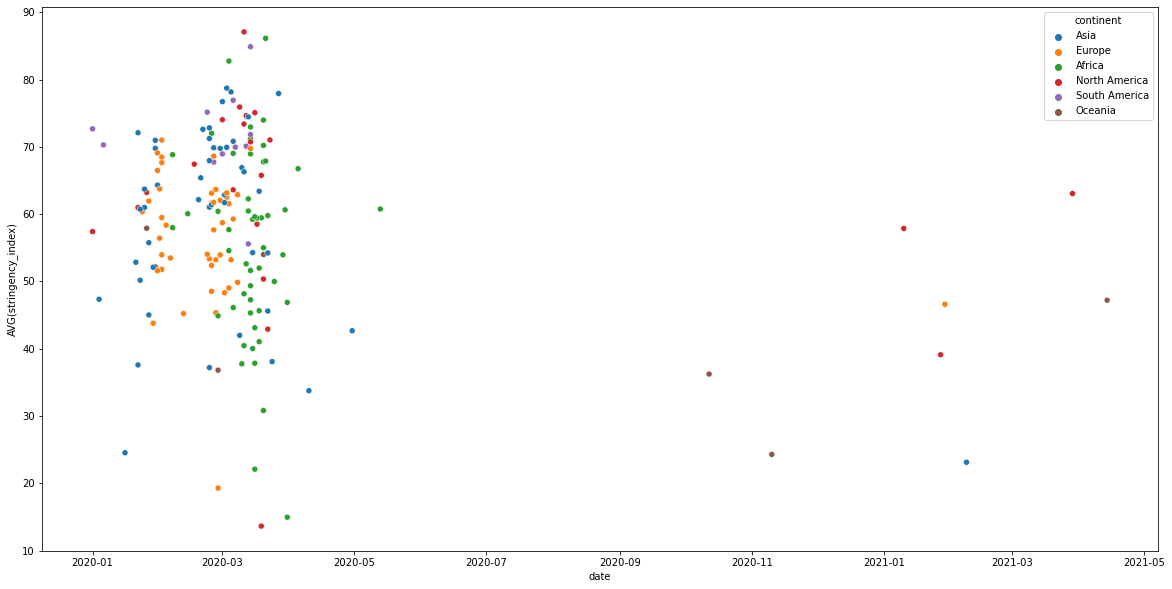

In [96]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df5, x=df5['date'], y=df5['AVG(stringency_index)'] ,hue='continent')


In [97]:
df5 = df5.dropna()
df5

,AVG(stringency_index),location,continent,date
0,37.208023,Afghanistan,Asia,2020-02-24
2,63.117644,Albania,Europe,2020-02-25
3,72.021475,Algeria,Africa,2020-02-25
4,48.320972,Andorra,Europe,2020-03-02
5,70.222625,Angola,Africa,2020-03-20
...,...,...,...,...
213,84.875157,Venezuela,South America,2020-03-14
214,60.746696,Vietnam,Asia,2020-01-23
216,33.778303,Yemen,Asia,2020-04-10
217,45.652482,Zambia,Africa,2020-03-18


<AxesSubplot:xlabel='date', ylabel='AVG(stringency_index)'>

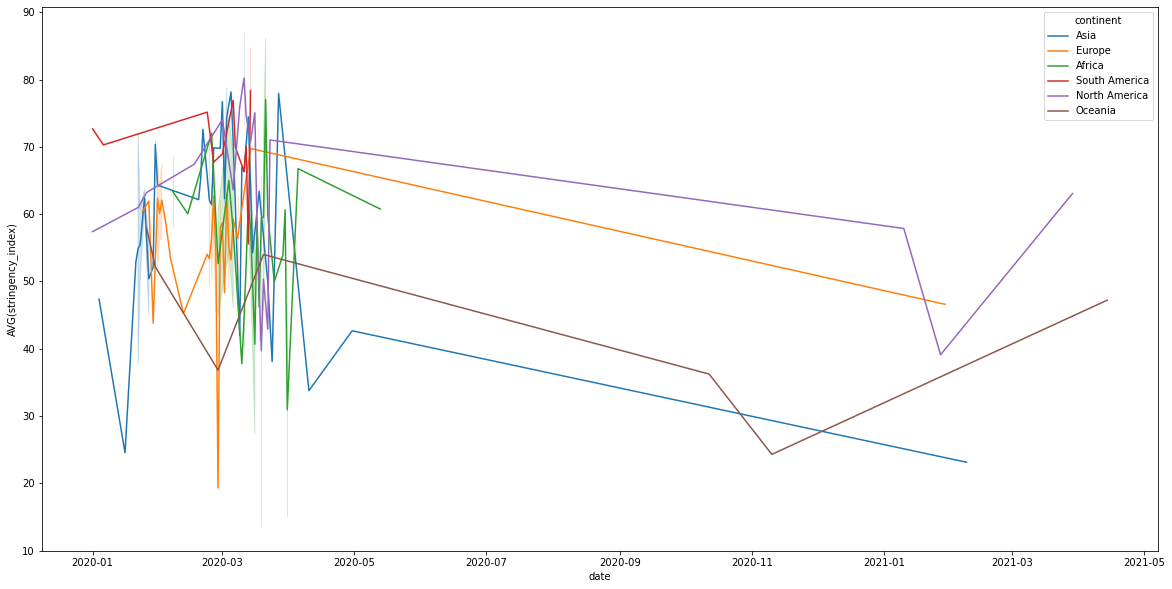

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df5, x=df5['date'], y=df5['AVG(stringency_index)'] ,hue='continent')

<AxesSubplot:xlabel='date', ylabel='AVG(stringency_index)'>

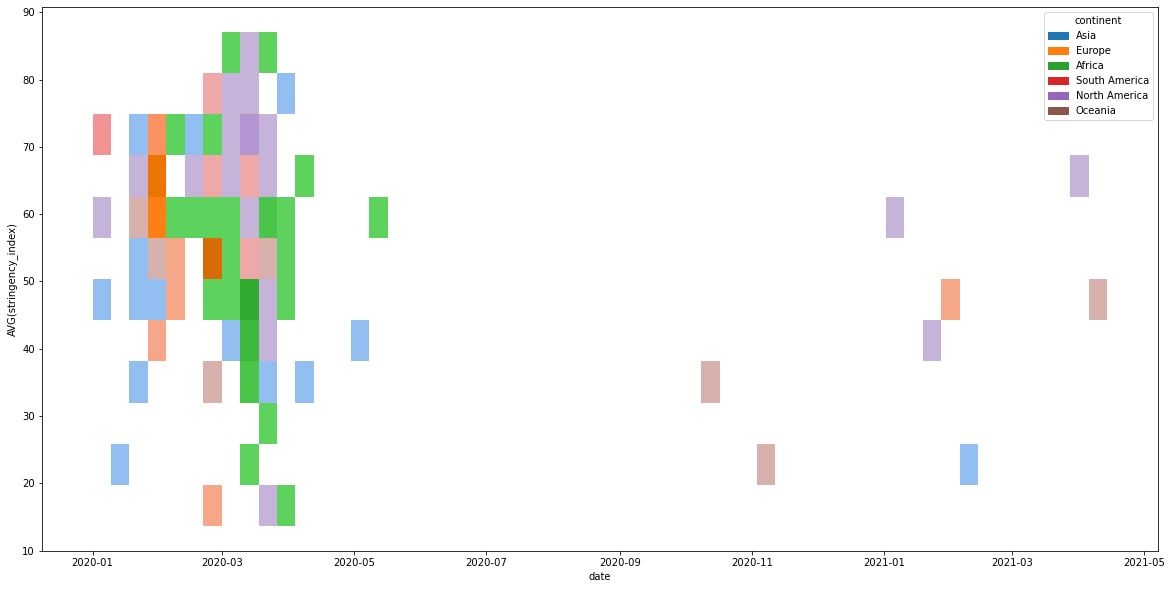

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(data=df5, x=df5['date'], y=df5['AVG(stringency_index)'] ,hue='continent')

<AxesSubplot:xlabel='location', ylabel='AVG(stringency_index)'>

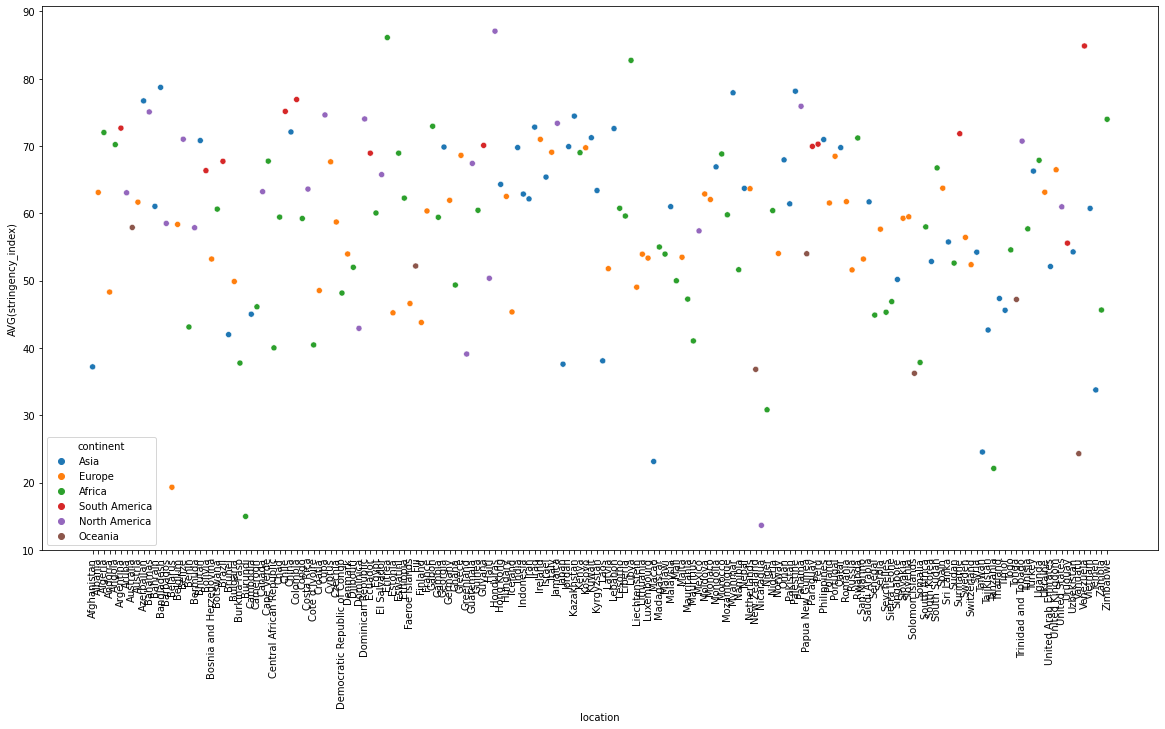

In [102]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(rotation=90)
sns.scatterplot(data=df5, x=df5['location'], y=df5['AVG(stringency_index)'] ,hue='continent')

## Bonus

Plot deaths per million for one country. Find Google's mobility for that country. Determine if lockdowns for that country have influenced deaths per million (changed the shape of the curve). Remember, you have have to create a lagged variable to account for time from infection to death (median time ~ 15 days). Therefore, any change in policy ("lockdown") would take ~15 days to see an effect

In [105]:
df7 = pd.read_sql("""SELECT total_deaths_per_million, date FROM data_covid WHERE location = 'Peru';""", conn)
df7

,total_deaths_per_million,date
0,NaN,2020-01-06
1,NaN,2020-01-07
2,NaN,2020-01-08
3,NaN,2020-01-09
4,NaN,2020-01-10
...,...,...
482,1884.214,2021-05-02
483,1891.765,2021-05-03
484,1900.834,2021-05-04
485,1900.834,2021-05-05


Plot cases per million for a given country. Look up when masks became mandatory in that country. Did this implementation of this anti-social
and anti-science intervention change the shape of the curve. (Meaning was their a sharp change in case numbers?